In [1]:
__doc__

'Automatically created module for IPython interactive environment'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [3]:
iris = datasets.load_iris()

In [10]:
X = iris['data'][:,:2]
y = iris.target
y.shape ,X.shape

((150,), (150, 2))

In [11]:
h = .02 # step size for the mesh
c = 1 # SVM regularization parameter

svc = svm.SVC(kernel="linear", C=c).fit(X,y)
rbf_svc = svm.SVC(kernel="rbf", gamma=0.7,C=c).fit(X,y)
poly_svc = svm.SVC(kernel="poly", degree=3, C=c).fit(X,y)
lin_svc = svm.LinearSVC(C=c).fit(X,y)

/home/nitec/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
X[:,0].min(), X[:,0].max()

(4.3, 7.9)

In [16]:
# create a mesh plot

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [17]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

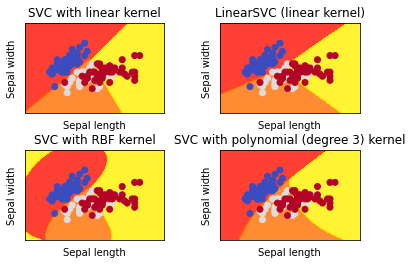

In [24]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.autumn, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max()) 
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()